## Persiapan


### Menyiapkan library yang dibutuhkan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Menyiapkan data yang akan diguankan


## Data Understanding


In [ ]:
df = pd.read_csv('/content/FedCycleData071012.csv')
df.head(10)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [ ]:
df.shape

(1665, 80)

In [ ]:
df.describe(include='all')

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
count,1665,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665,1665,1665,1665,...,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665
unique,159,NaN,NaN,NaN,NaN,NaN,105,24,30,23,...,8,9,16,6,8,8,4,3,2,112
top,nfp8122,NaN,NaN,NaN,NaN,NaN,,14,13,,...,,,,,,,,,,
freq,45,NaN,NaN,NaN,NaN,NaN,1524,227,338,258,...,1523,1635,1633,1523,1523,1524,1523,1523,1523,1534
mean,NaN,8.040841,0.382583,0.912312,0.055255,29.299099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.593686,0.486164,0.282925,0.479706,3.887932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.000000,0.000000,0.000000,18.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.000000,0.000000,1.000000,0.000000,27.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,7.000000,0.000000,1.000000,0.000000,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,11.000000,1.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

In [ ]:
df = df.replace(' ', np.nan)
df.isnull().sum()

,0
ClientID,0
CycleNumber,0
Group,0
CycleWithPeakorNot,0
ReproductiveCategory,0
...,...
NextpregM,1524
Spousesame,1523
SpousesameM,1523
Timeattemptpreg,1523


In [ ]:
missing_cols= []
missing_values = []
for cols in df.columns:
    if df[cols].isnull().sum() == 0:
        missing_values.append(cols)

    else:
        missing_cols.append(cols)

print(f'Jumlah Kolom tanpa ada nilai yang hilang:  {len(missing_values)}\n')
print(f'Jumlah Kolom dengan nilai yang hilang :  {len(missing_cols)}')

Jumlah Kolom tanpa ada nilai yang hilang:  6

Jumlah Kolom dengan nilai yang hilang :  74


In [ ]:
# Tampilkan hanya kolom yang punya NaN
missing_cols = df.columns[df.isna().any()]
print(df[missing_cols].isna().sum())

MeanCycleLength            1524
EstimatedDayofOvulation     150
LengthofLutealPhase         151
FirstDayofHigh              258
TotalNumberofHighDays        12
                           ... 
NextpregM                  1524
Spousesame                 1523
SpousesameM                1523
Timeattemptpreg            1523
BMI                        1534
Length: 74, dtype: int64


## Data Preparation / Preprocessing


In [ ]:
# Hanlde Missing Value
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})

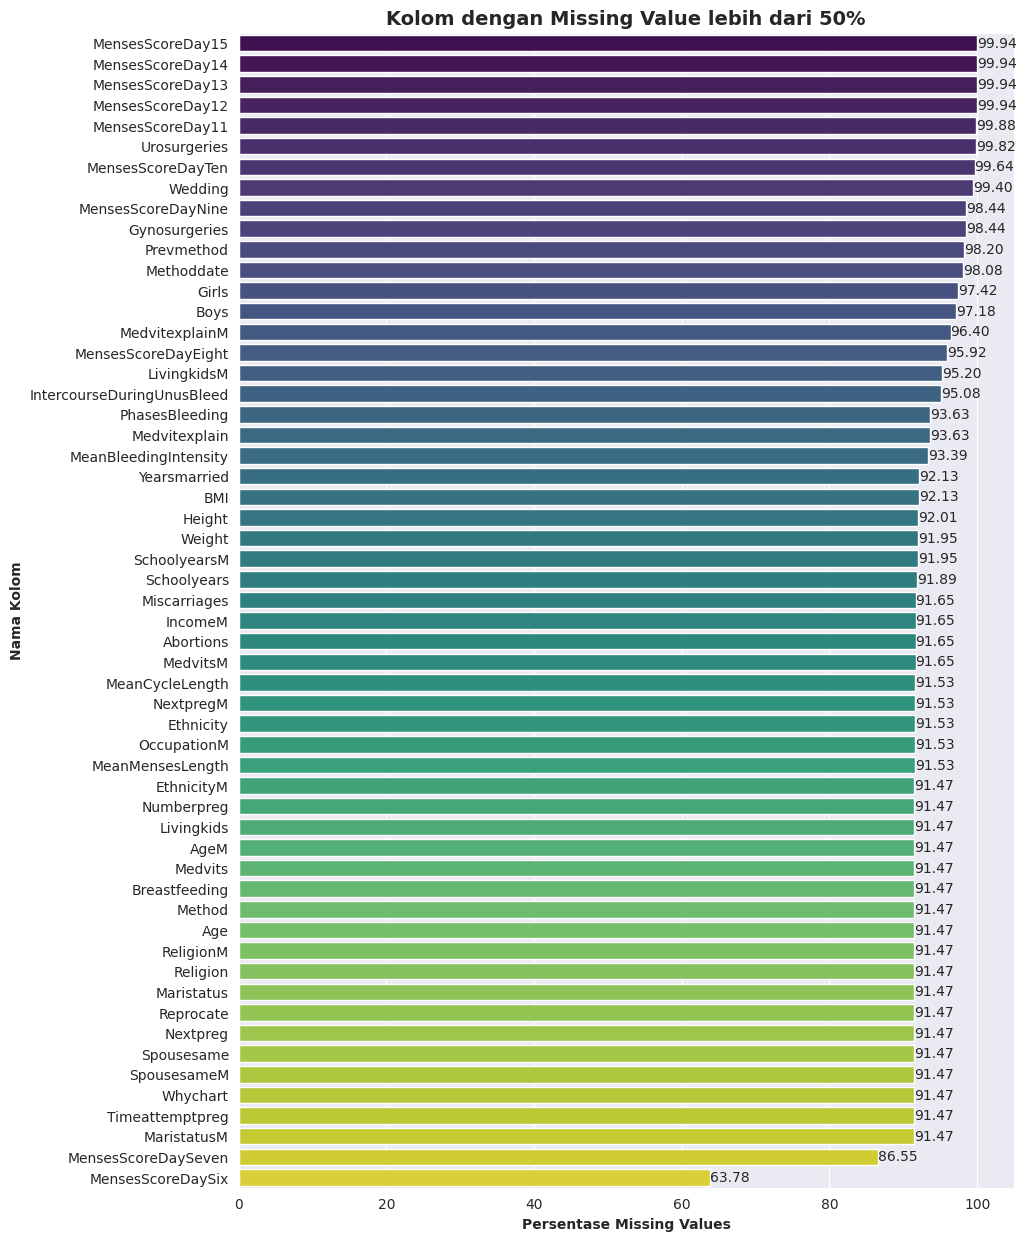

In [ ]:
# Visualisasi Missing value lebih dari 50%
sns.set_style('darkgrid')
plt.figure(figsize=(10, 15))

ax = sns.barplot(
    data=null_values[null_values["Missing Values in Percentage"] >= 50],
    x="Missing Values in Percentage",
    y="Column Name",
    hue="Column Name",
    palette="viridis"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Kolom dengan Missing Value lebih dari 50%', fontsize=14, fontweight='bold')
plt.xlabel('Persentase Missing Values', fontweight='bold')
plt.ylabel('Nama Kolom', fontweight='bold')
plt.show()

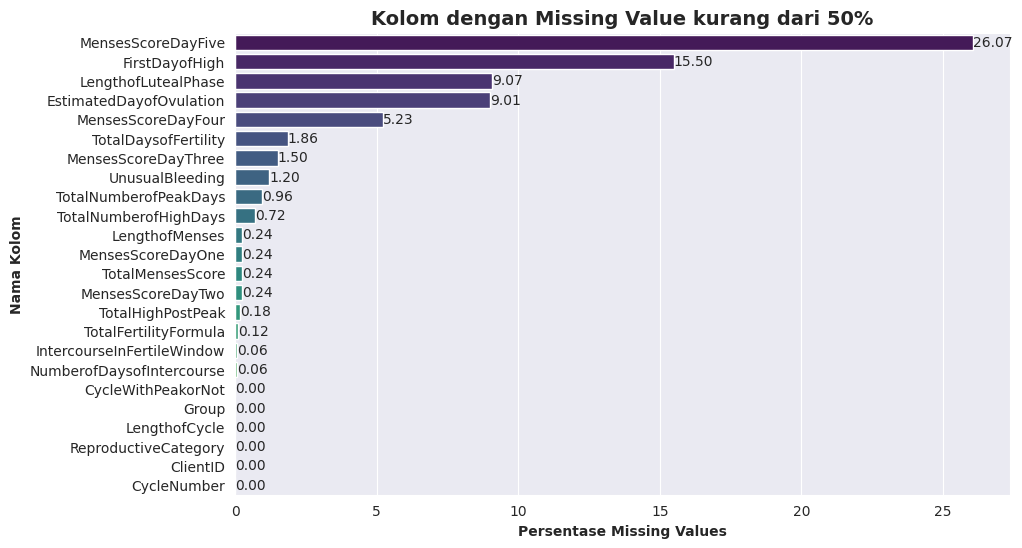

In [ ]:
# Visualisasi Missing value kurang dari 50%
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax=sns.barplot(
    data=null_values[null_values["Missing Values in Percentage"] < 50],
    x="Missing Values in Percentage",
    y="Column Name",
    hue="Column Name",
    palette="viridis"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Kolom dengan Missing Value kurang dari 50%', fontsize=14, fontweight='bold')
plt.xlabel('Persentase Missing Values', fontweight='bold')
plt.ylabel('Nama Kolom',fontweight='bold')
plt.show()

In [ ]:
# Hapus Kolom Missing values lebih 50%
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
remove_cols_existing = [col for col in remove_cols if col in df.columns]
df = df.drop(columns=remove_cols_existing)

# Drop kolom dengan jumlah non-null kurang dari 1000
df = df.drop(columns=[col for col in df.columns if df[col].count() < 1000])

dropped_cols = [col for col in df.columns if df[col].count() < 1000]
print("Dropped columns after filtering by count < 1000:", dropped_cols)

Dropped columns after filtering by count < 1000: []


In [ ]:
df.shape

(1665, 24)

In [ ]:
df.dtypes

,0
ClientID,object
CycleNumber,int64
Group,int64
CycleWithPeakorNot,int64
ReproductiveCategory,int64
LengthofCycle,int64
EstimatedDayofOvulation,object
LengthofLutealPhase,object
FirstDayofHigh,object
TotalNumberofHighDays,object


Categorical columns: Index(['ClientID', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak',
       'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne',
       'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding'],
      dtype='object')


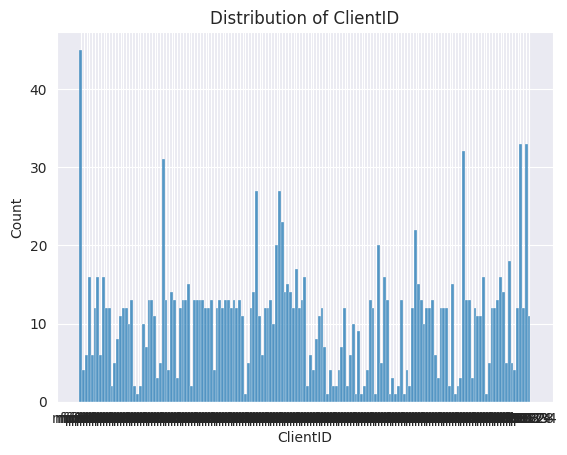

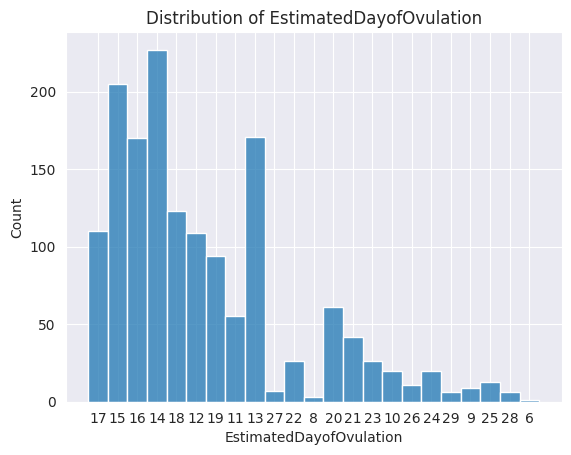

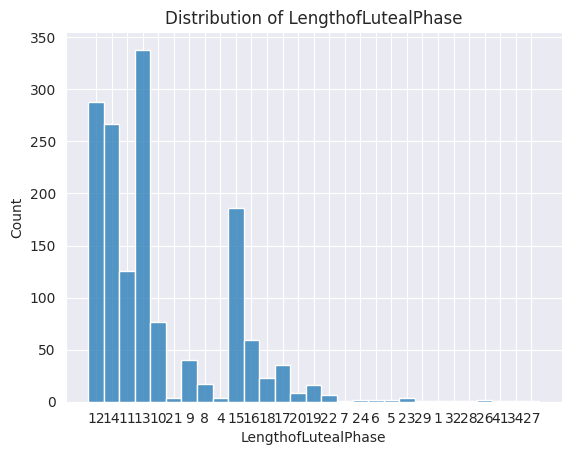

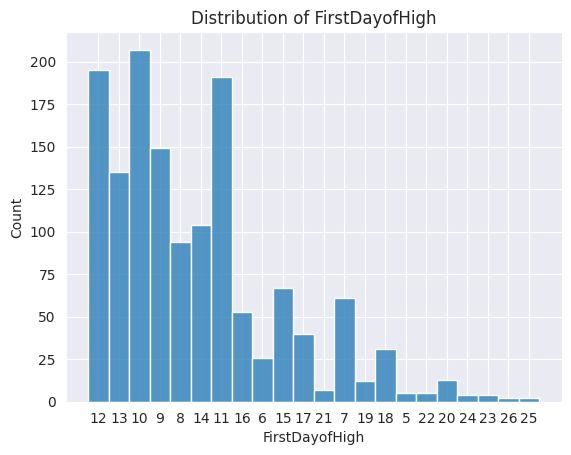

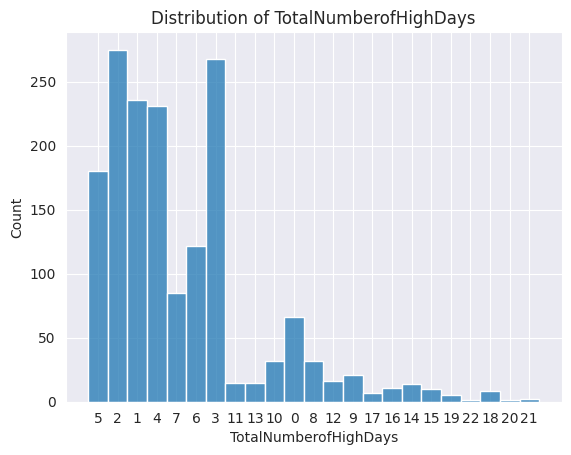

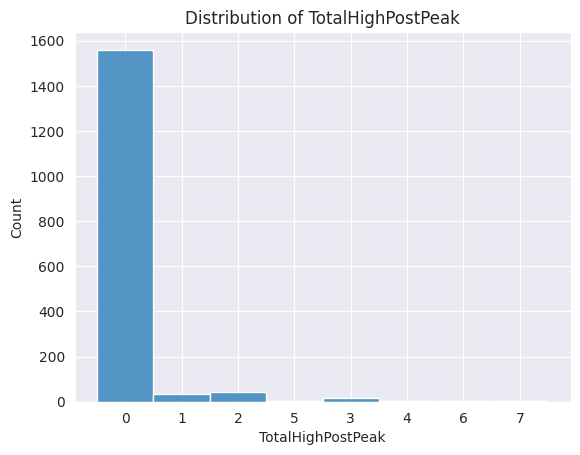

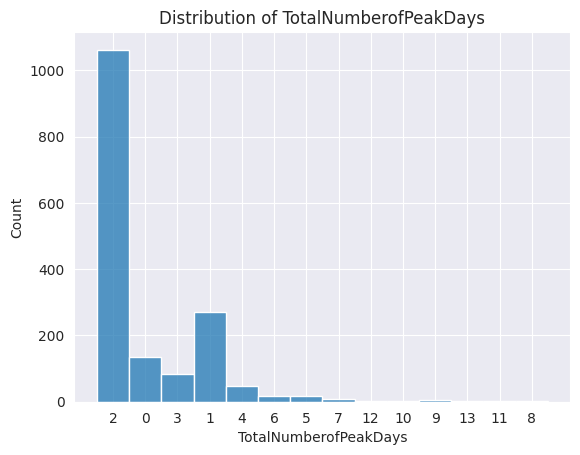

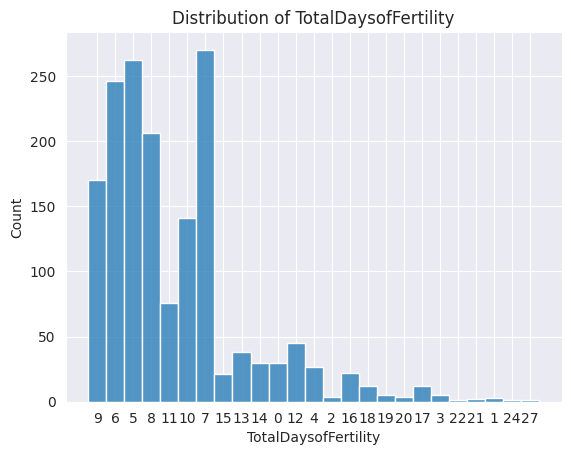

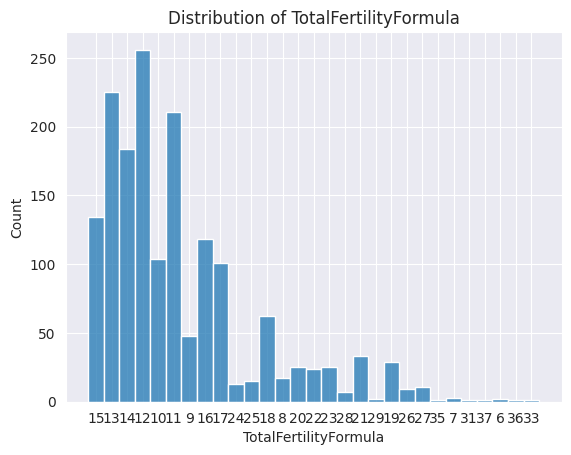

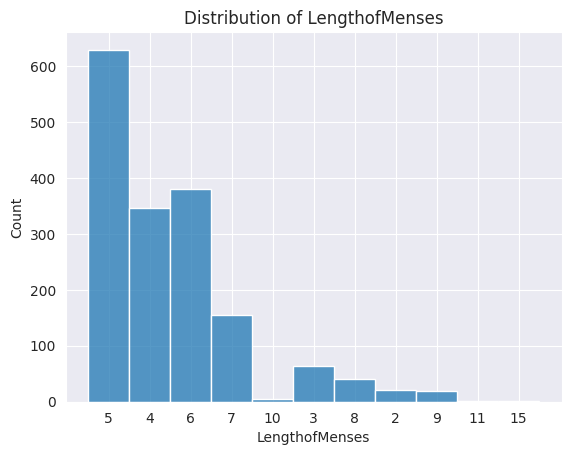

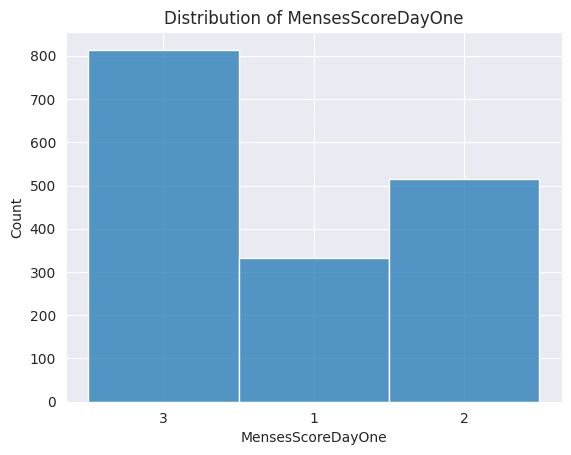

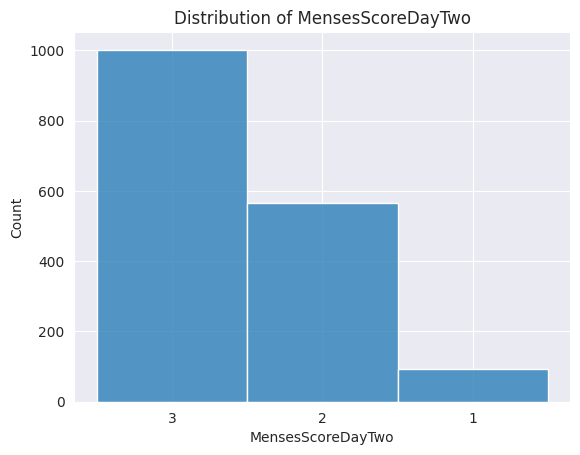

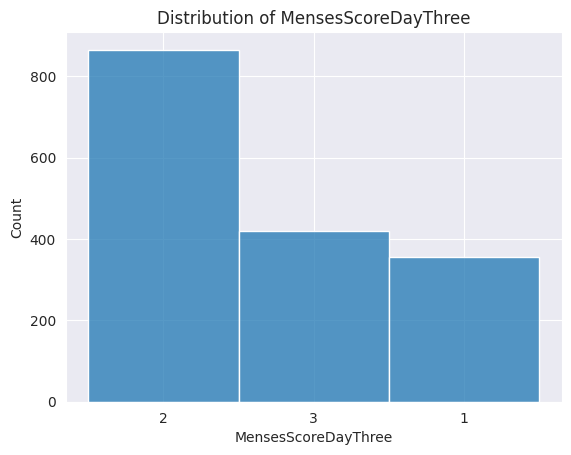

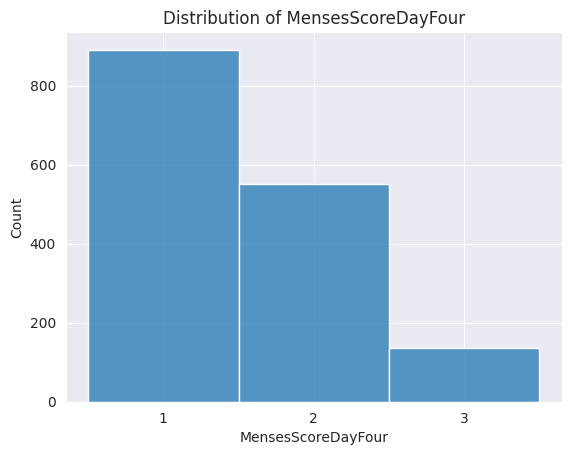

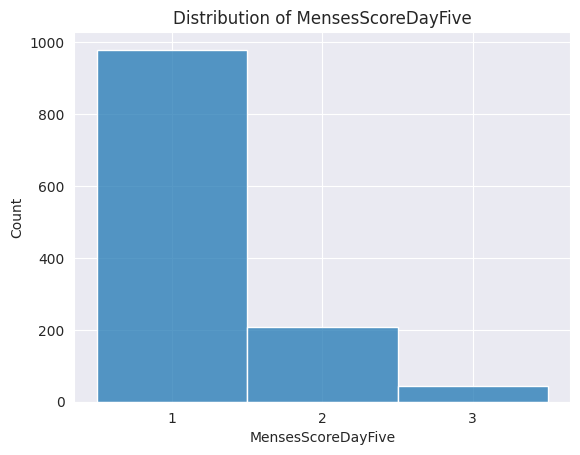

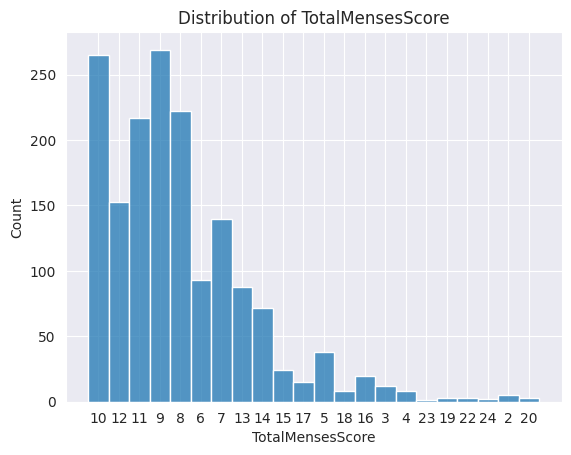

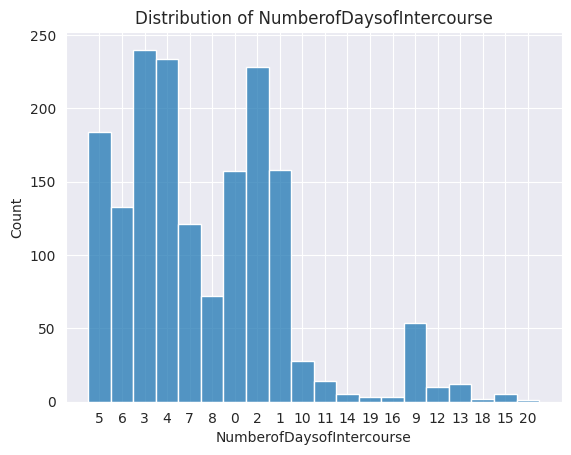

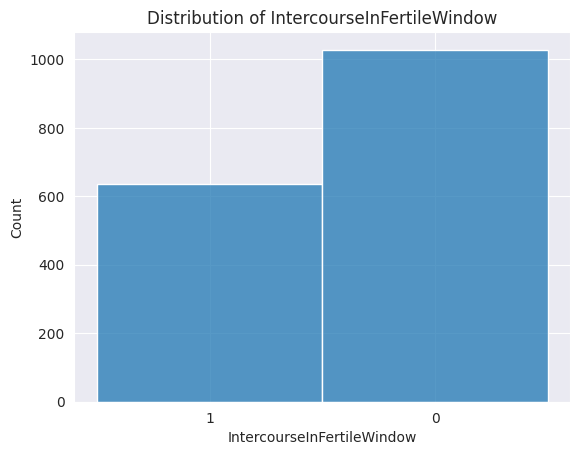

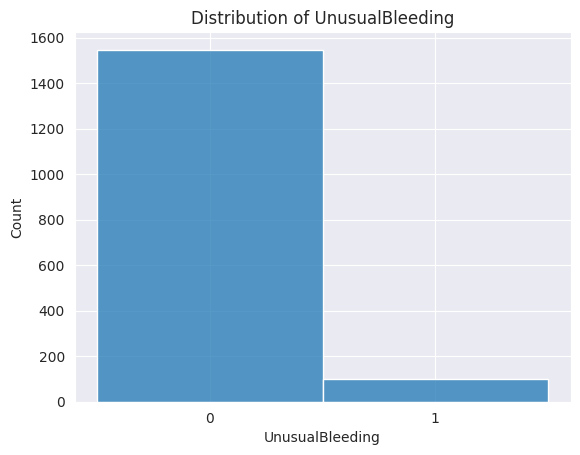

In [ ]:
# Pilih kolom kategorikal
categorical_columns = df.select_dtypes(include= object).columns
print("Categorical columns:", categorical_columns)

# Cek distribusi data categorical
for i in categorical_columns:
    sns.histplot(data=df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

label_encoders = LabelEncoder()

for cols in categorical_columns:
        df[cols] = label_encoders.fit_transform(df[cols])

In [ ]:
print("\nData types after Label Encoding:")
print(df.dtypes)


Data types after Label Encoding:
ClientID                      int64
CycleNumber                   int64
Group                         int64
CycleWithPeakorNot            int64
ReproductiveCategory          int64
LengthofCycle                 int64
EstimatedDayofOvulation       int64
LengthofLutealPhase           int64
FirstDayofHigh                int64
TotalNumberofHighDays         int64
TotalHighPostPeak             int64
TotalNumberofPeakDays         int64
TotalDaysofFertility          int64
TotalFertilityFormula         int64
LengthofMenses                int64
MensesScoreDayOne             int64
MensesScoreDayTwo             int64
MensesScoreDayThree           int64
MensesScoreDayFour            int64
MensesScoreDayFive            int64
TotalMensesScore              int64
NumberofDaysofIntercourse     int64
IntercourseInFertileWindow    int64
UnusualBleeding               int64
dtype: object


In [ ]:
# Mengisi Missing values(NaN) dengan nilai rata-rata(mean)
for col in df.columns:
    if df[col].isnull().sum() > 100:
        if df[col].dtype in ['int64', 'float64']:  # Hanya kolom numerik
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # Untuk kolom kategorikal
            df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
ClientID,0
CycleNumber,0
Group,0
CycleWithPeakorNot,0
ReproductiveCategory,0
LengthofCycle,0
EstimatedDayofOvulation,0
LengthofLutealPhase,0
FirstDayofHigh,0
TotalNumberofHighDays,0


In [ ]:
df.drop_duplicates()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,49,1,0,1,0,29,7,3,2,18,...,6,2,2,1,0,0,0,15,1,0
1,49,2,0,1,0,27,5,3,3,12,...,6,2,2,1,0,0,0,16,1,0
2,49,3,0,1,0,29,5,5,22,1,...,6,2,2,1,0,0,0,15,1,0
3,49,4,0,1,0,27,5,3,3,12,...,6,2,2,2,1,0,2,13,0,0
4,49,5,0,1,0,28,6,3,2,17,...,6,2,2,1,1,0,1,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,158,7,1,1,0,29,9,1,3,18,...,9,1,2,2,1,1,5,18,0,1
1661,158,8,1,1,0,28,7,2,2,16,...,7,2,2,1,0,0,1,3,1,0
1662,158,9,1,1,0,28,6,3,1,17,...,6,2,1,1,0,0,21,17,0,0
1663,158,10,1,1,1,40,17,4,3,5,...,7,1,2,2,1,0,2,13,0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClientID,1665.0,78.851652,47.005296,0.0,40.0,71.0,122.0,158.0
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
Group,1665.0,0.382583,0.486164,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
LengthofCycle,1665.0,29.299099,3.887932,18.0,27.0,29.0,31.0,54.0
EstimatedDayofOvulation,1665.0,7.678078,6.013279,0.0,4.0,6.0,9.0,23.0
LengthofLutealPhase,1665.0,7.613213,8.365412,0.0,3.0,5.0,6.0,29.0
FirstDayofHigh,1665.0,9.324324,8.938521,0.0,2.0,5.0,20.0,22.0
TotalNumberofHighDays,1665.0,12.710511,6.870473,0.0,9.0,16.0,18.0,23.0


### Handling Outliers

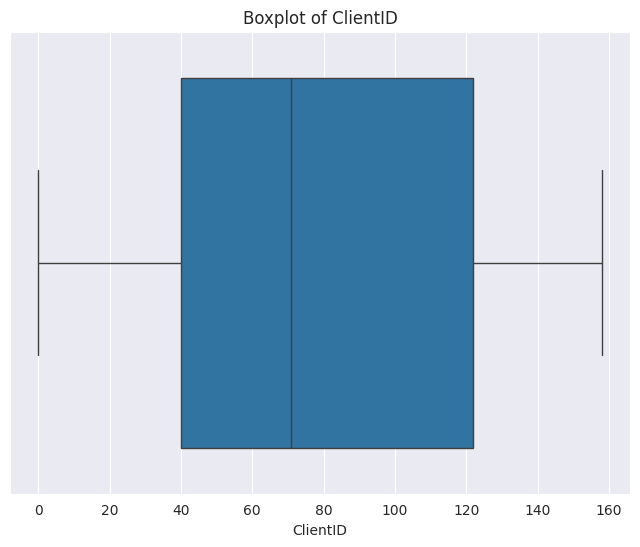

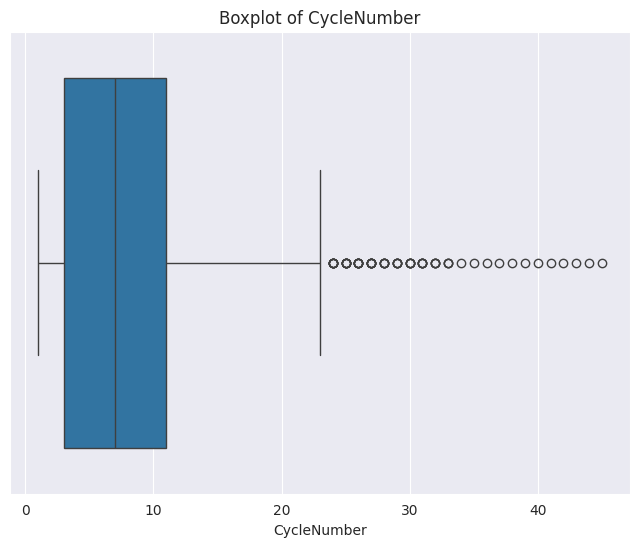

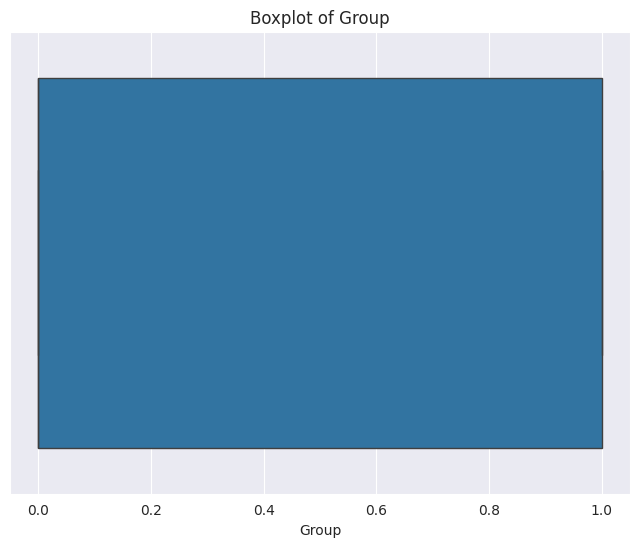

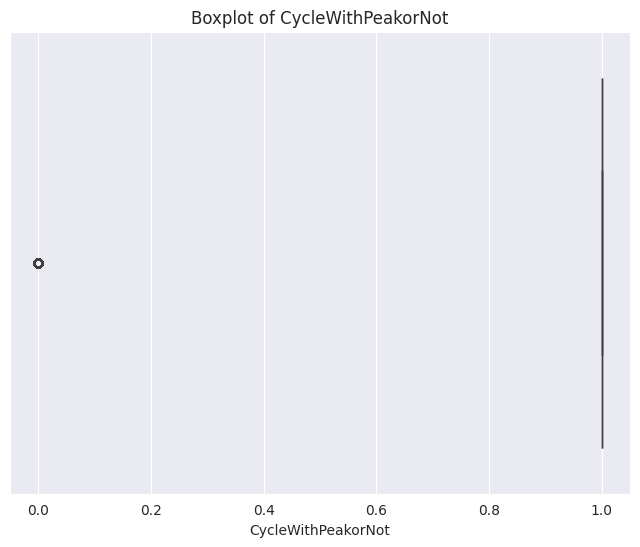

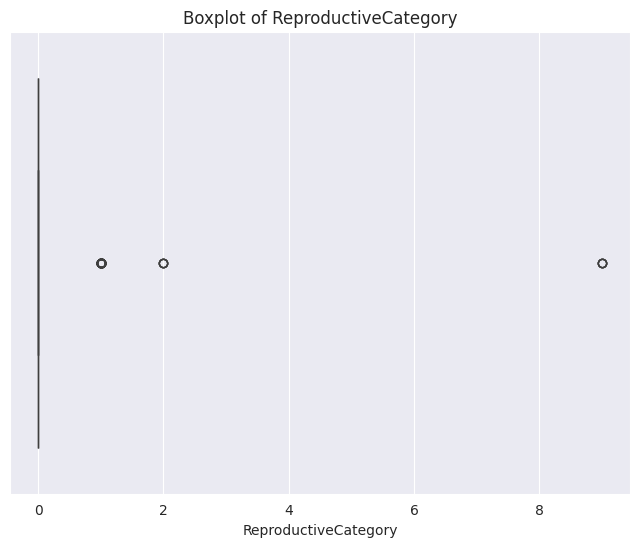

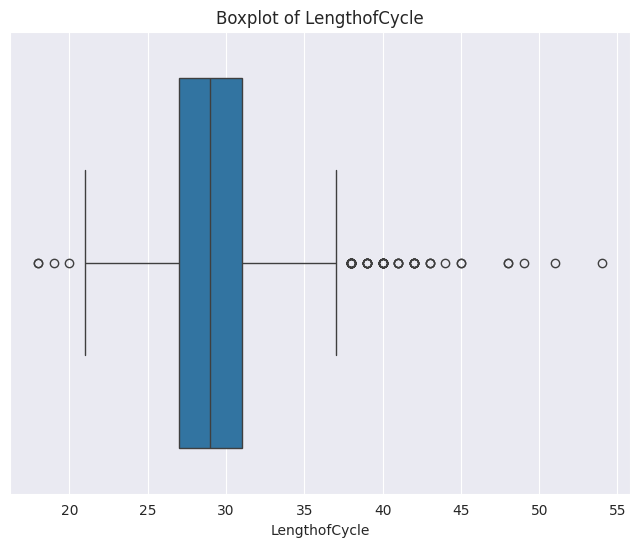

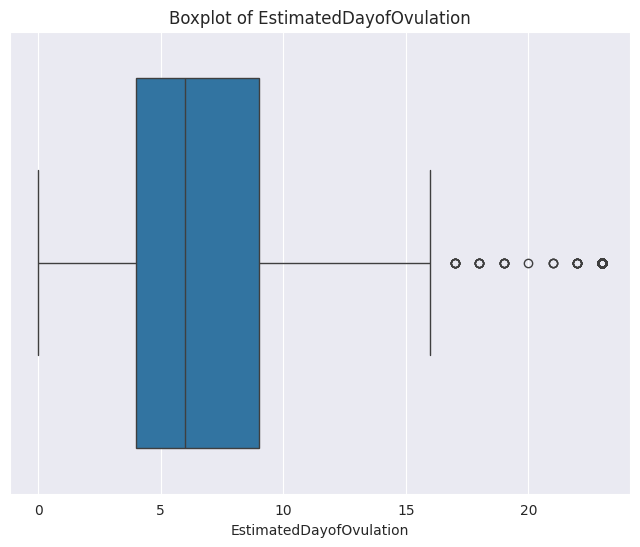

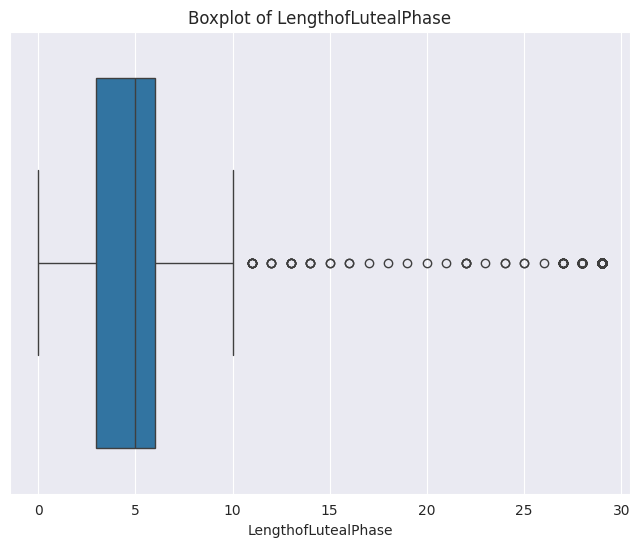

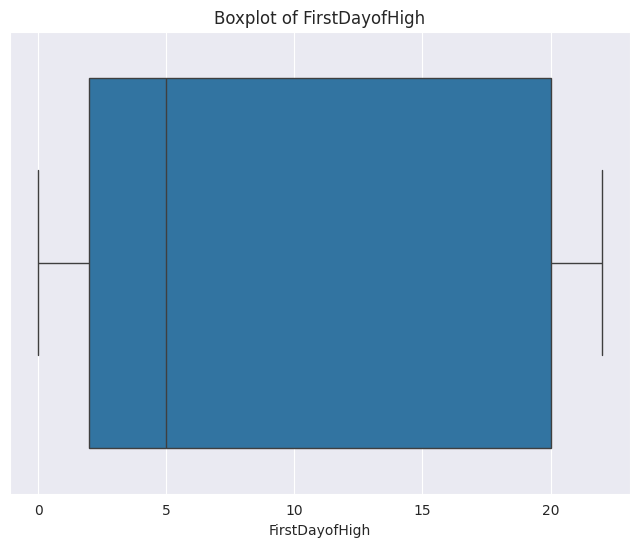

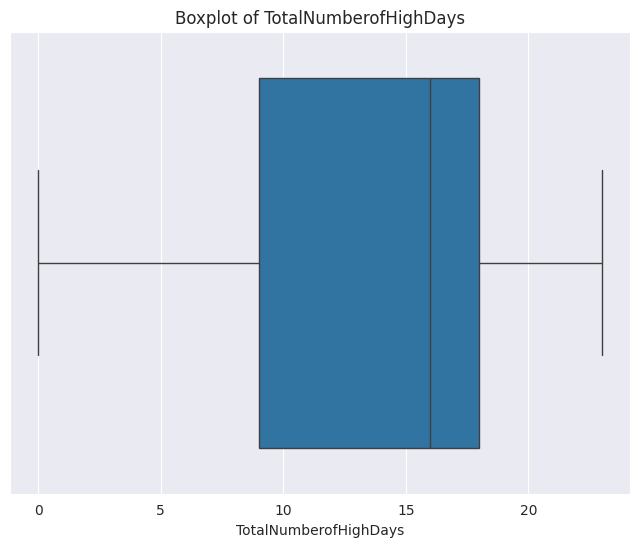

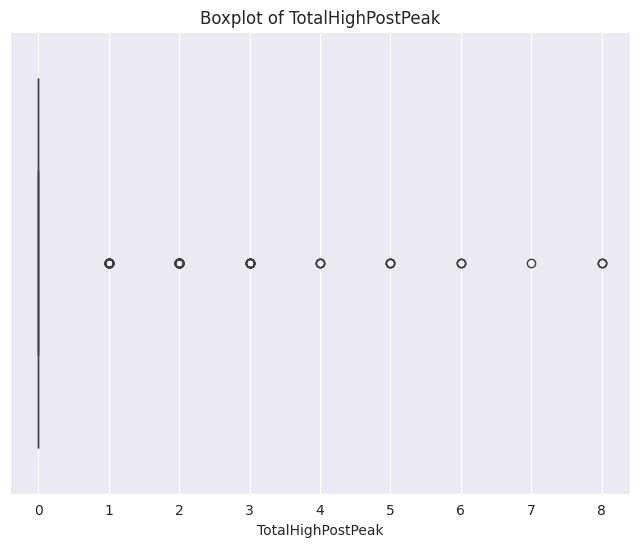

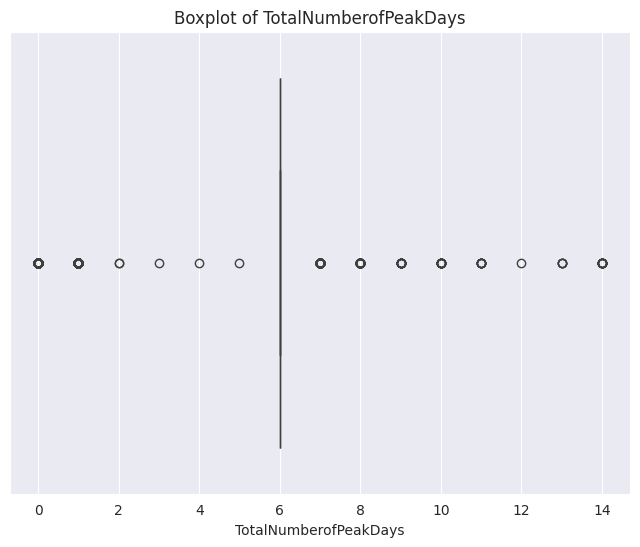

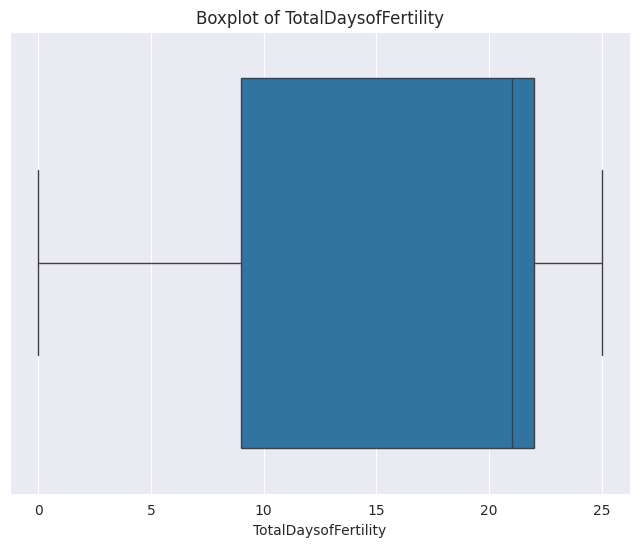

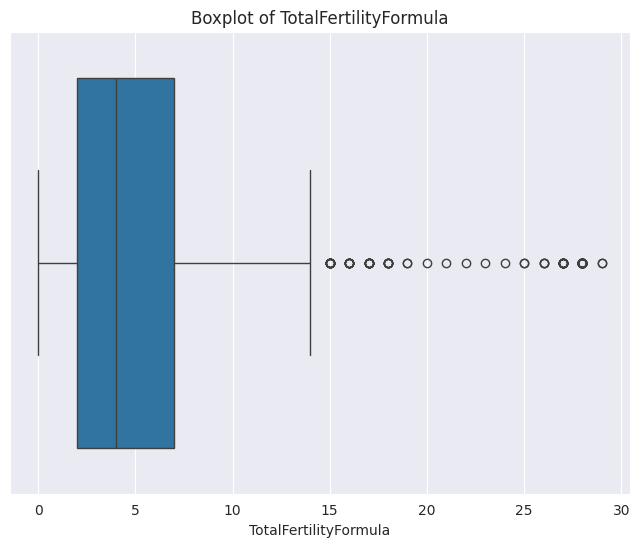

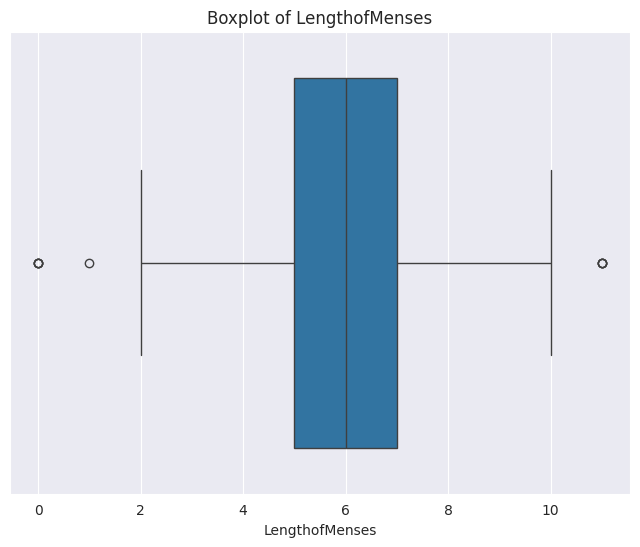

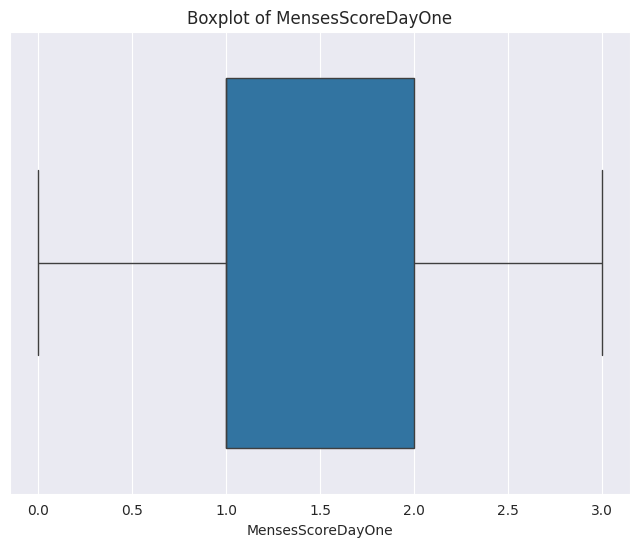

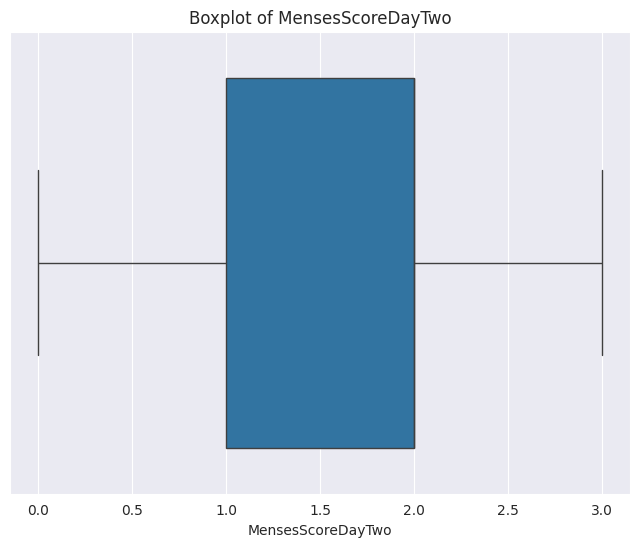

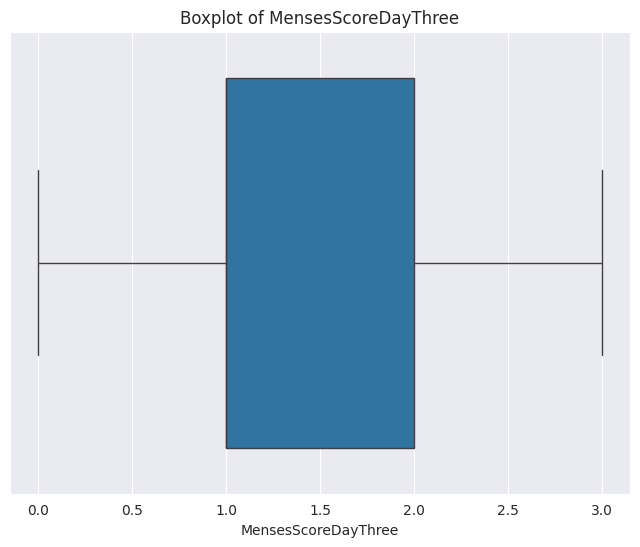

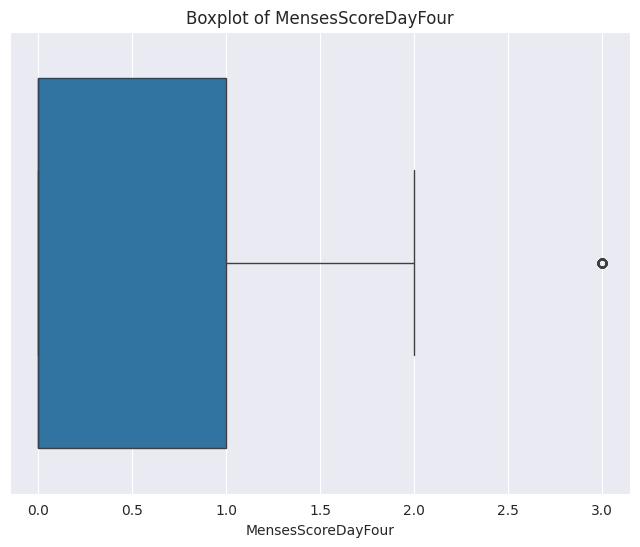

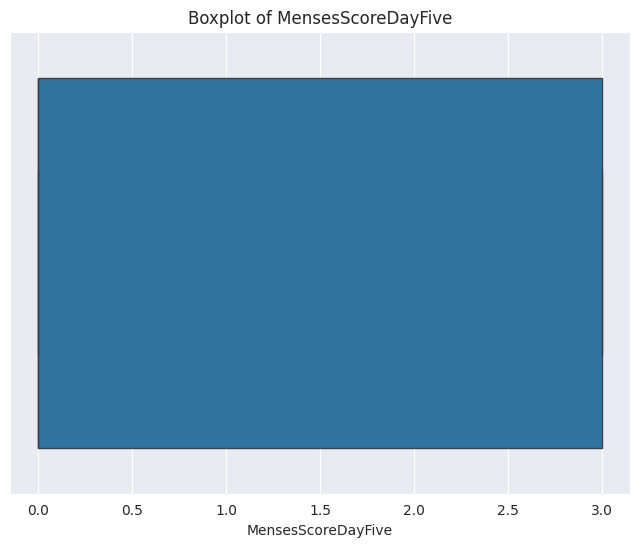

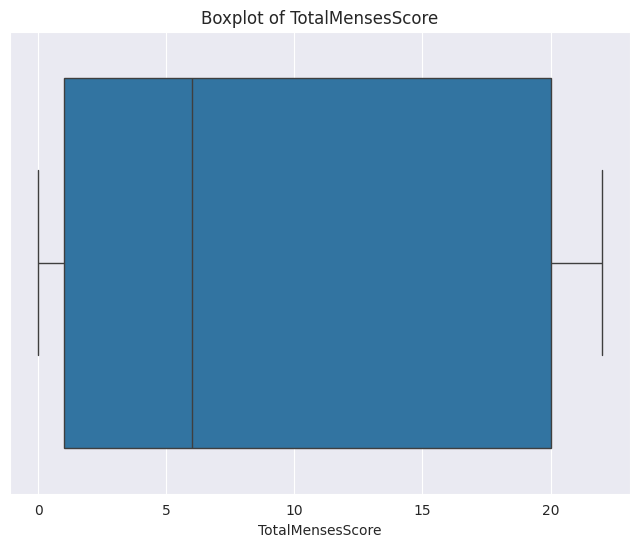

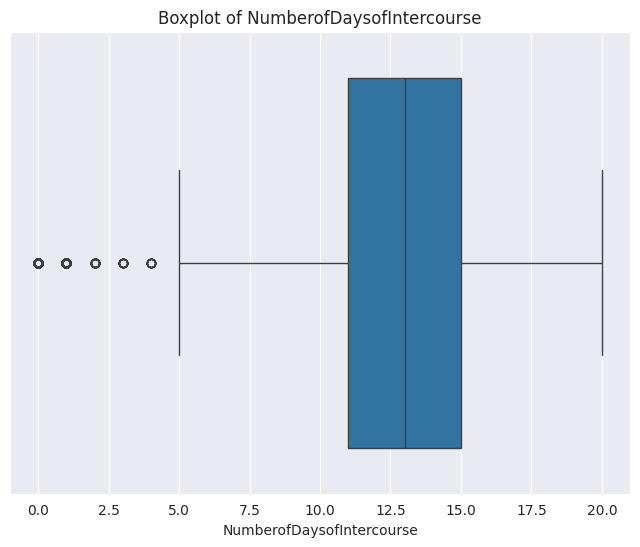

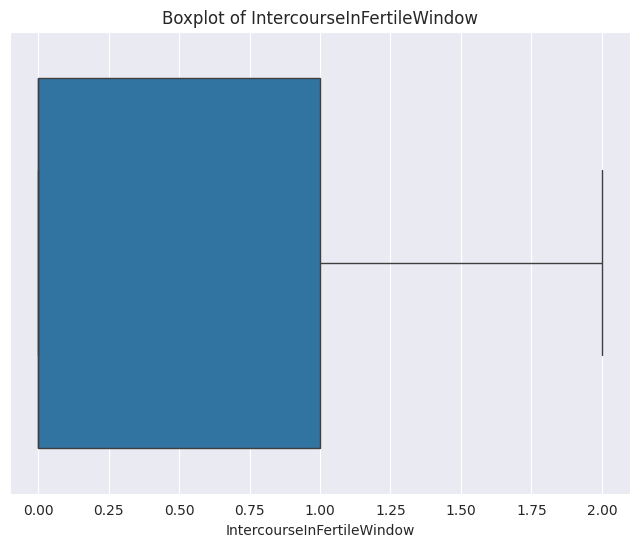

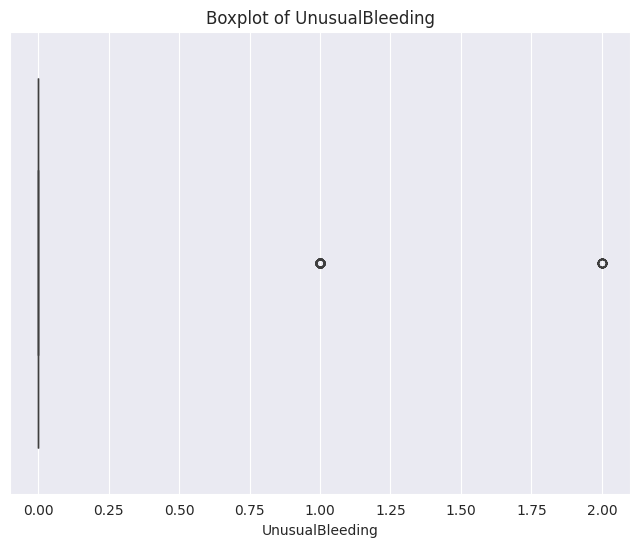

In [ ]:
# Visualisasi dengan boxplot
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

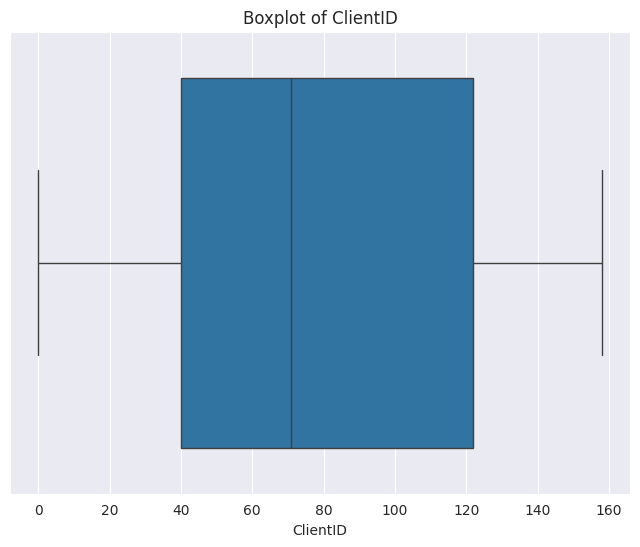

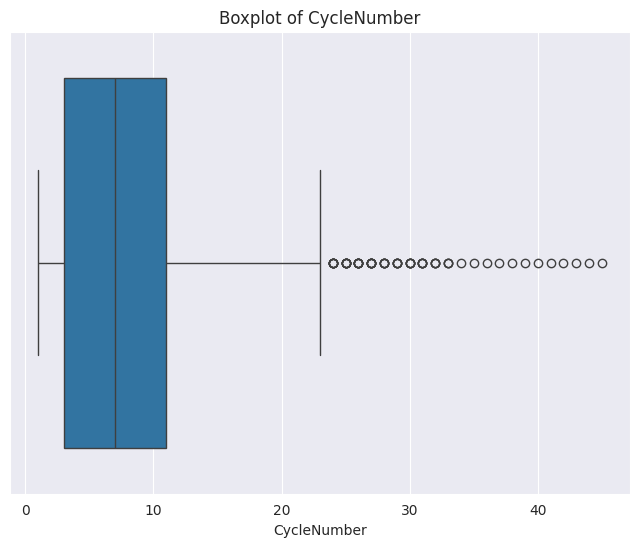

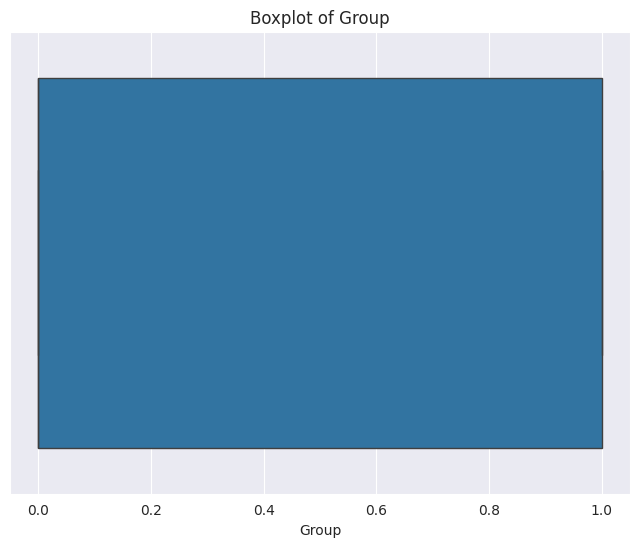

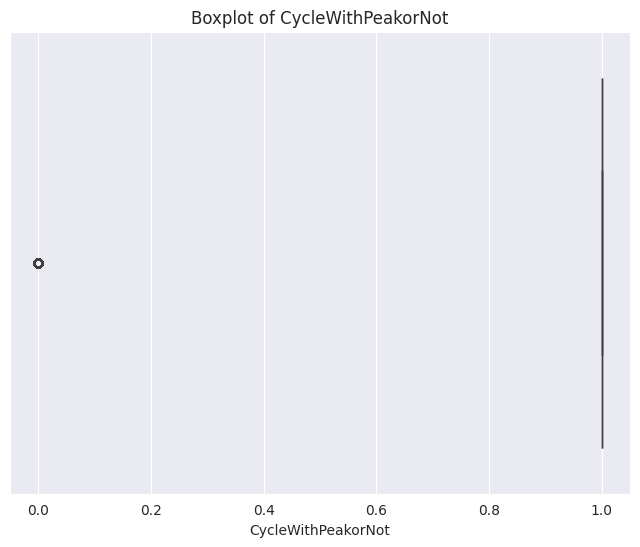

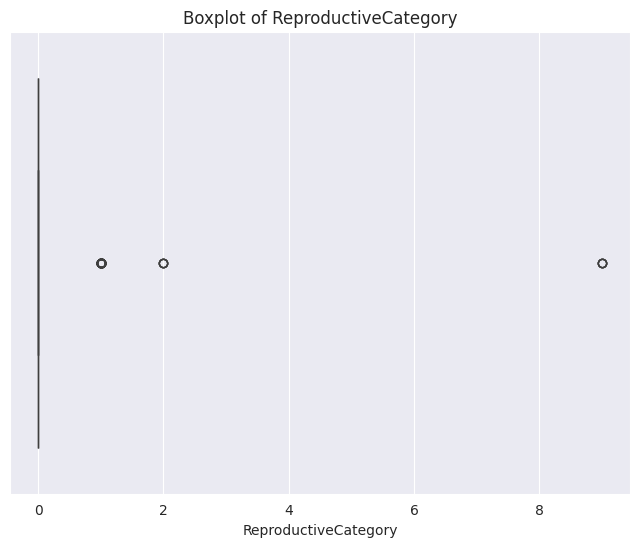

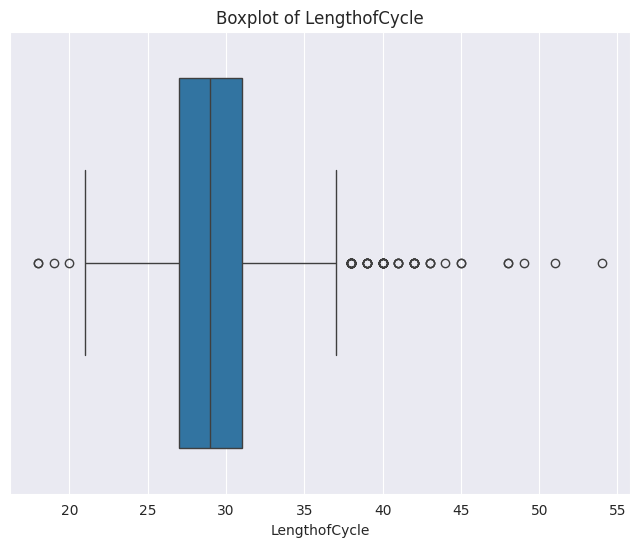

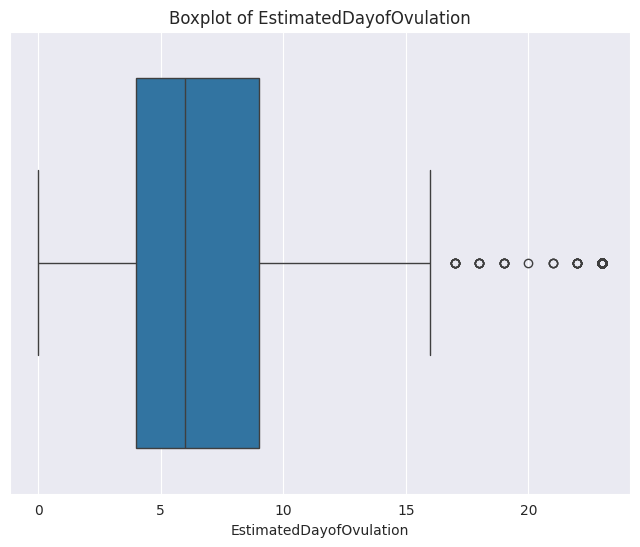

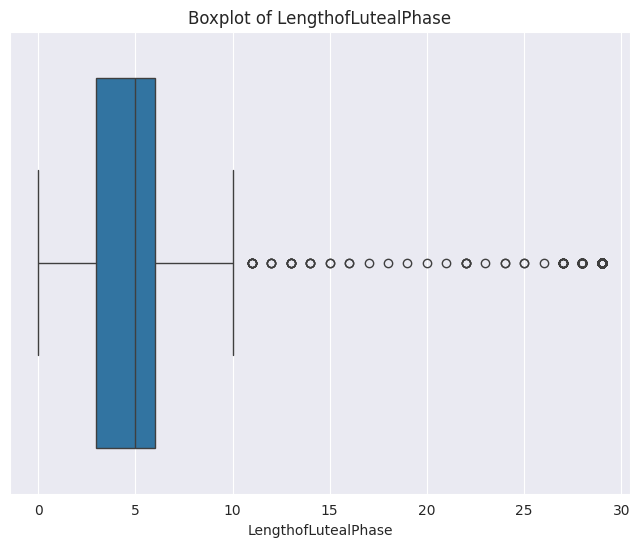

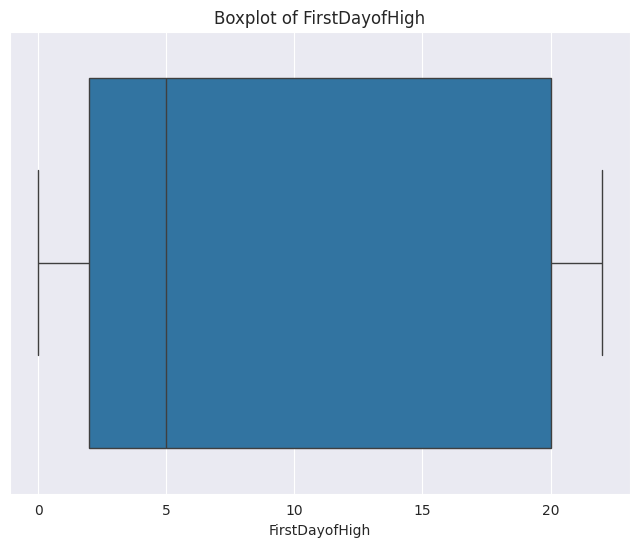

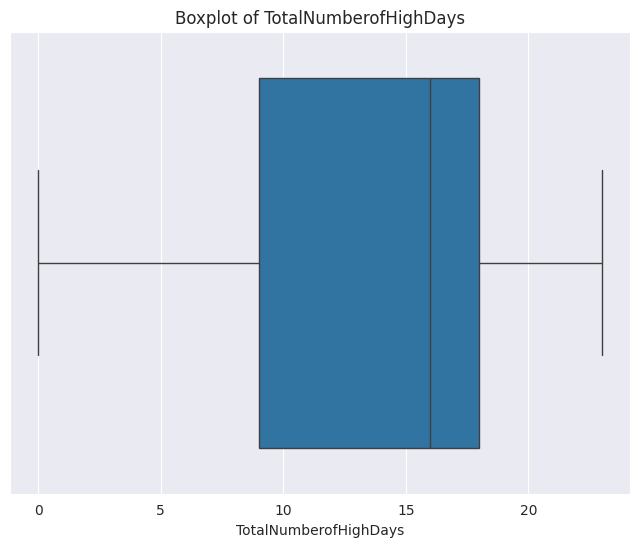

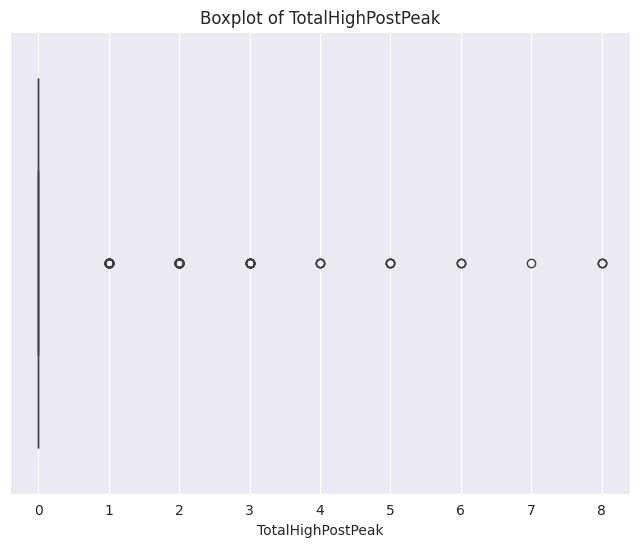

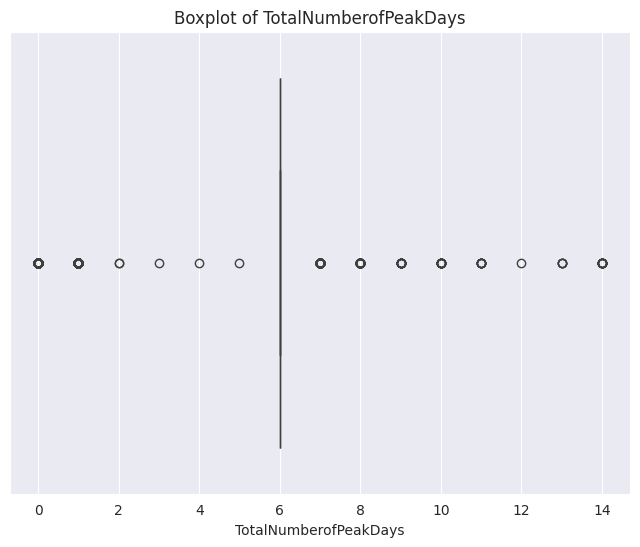

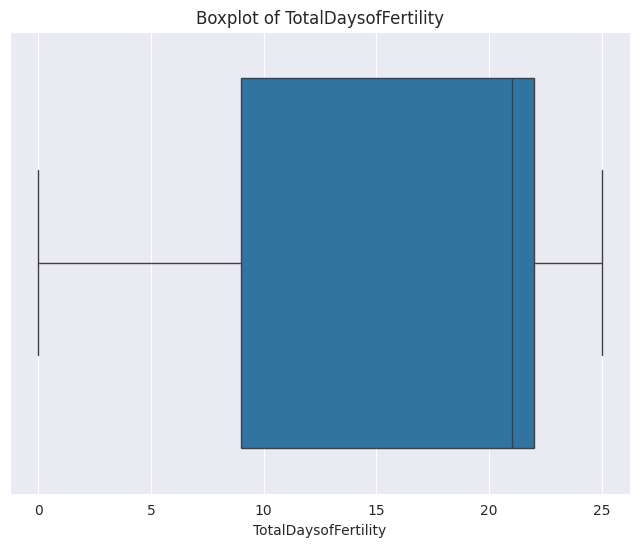

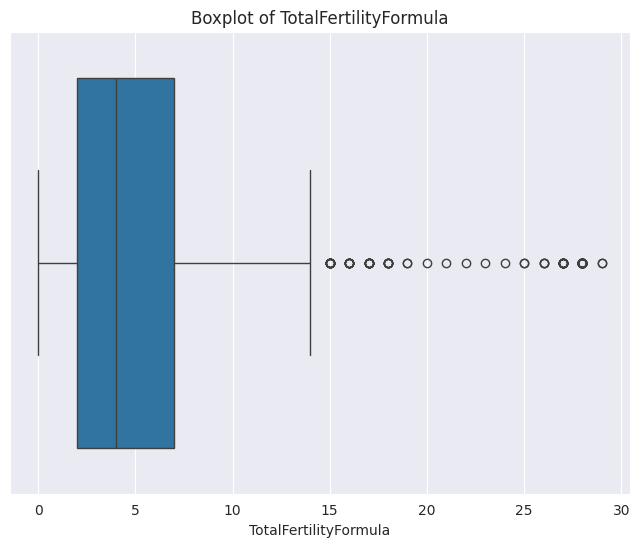

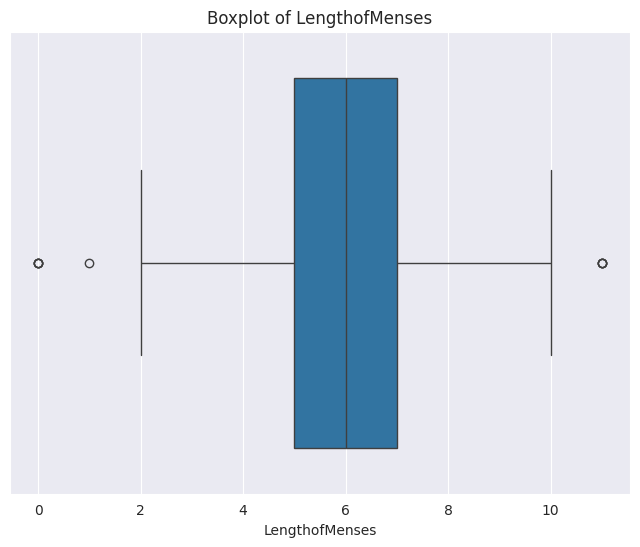

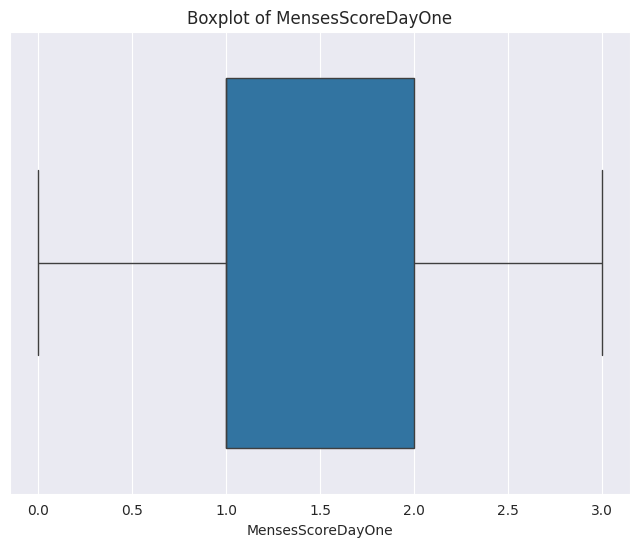

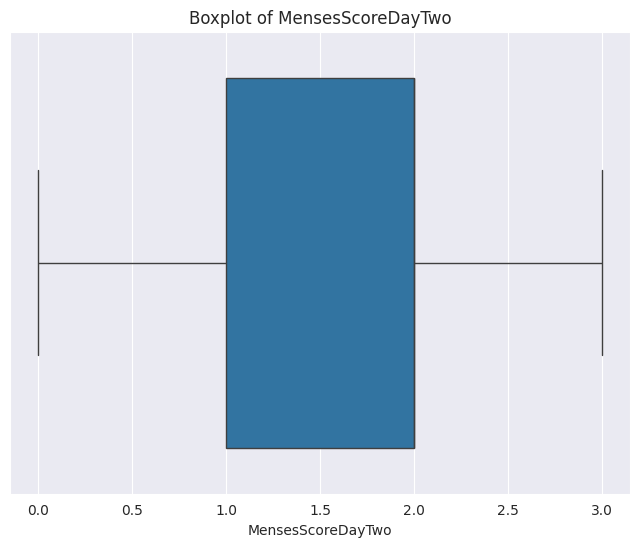

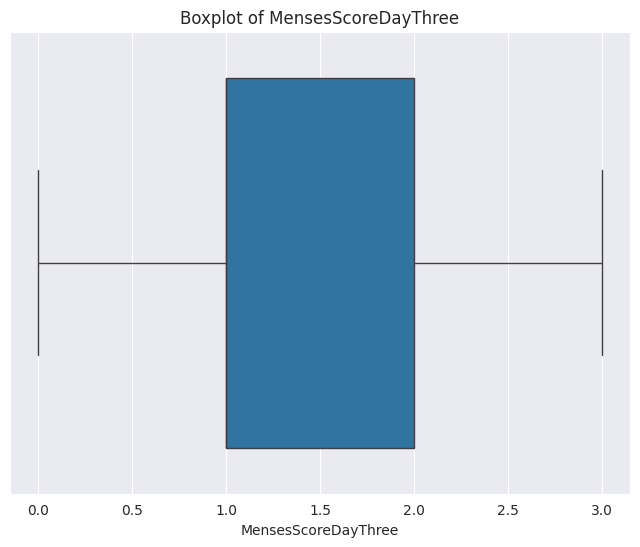

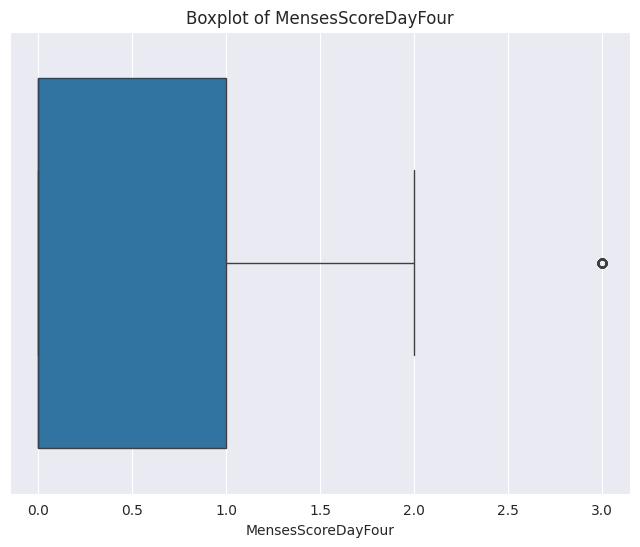

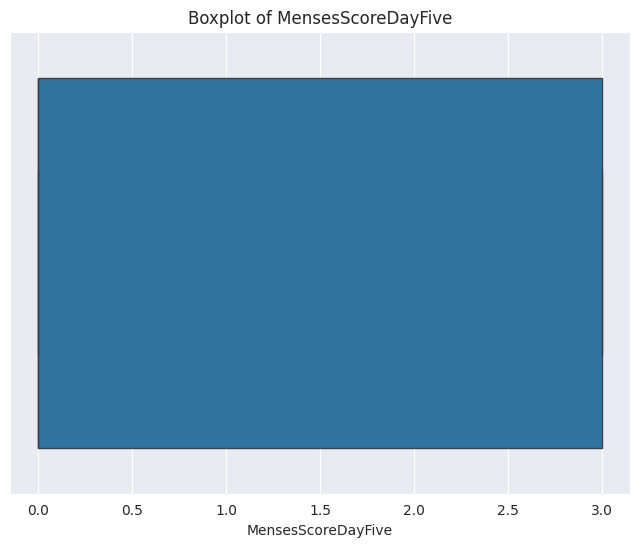

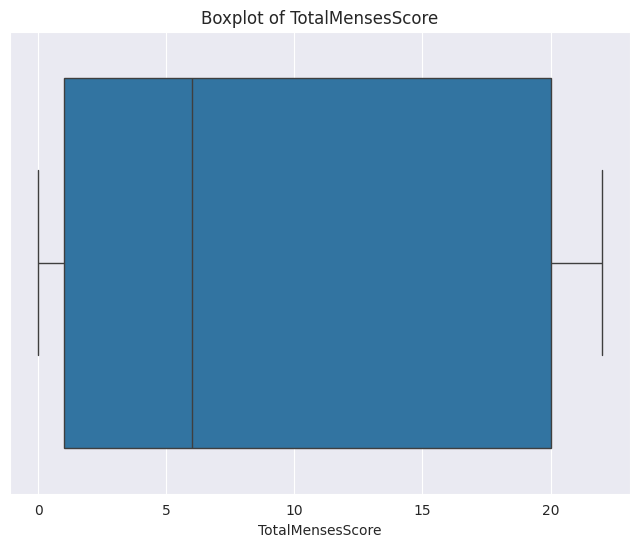

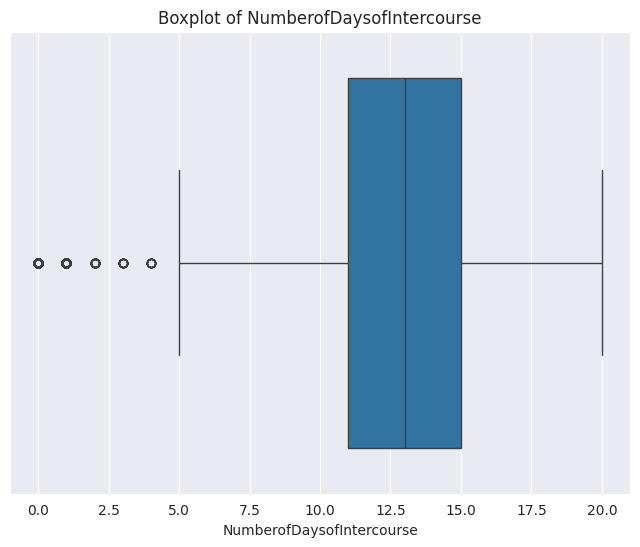

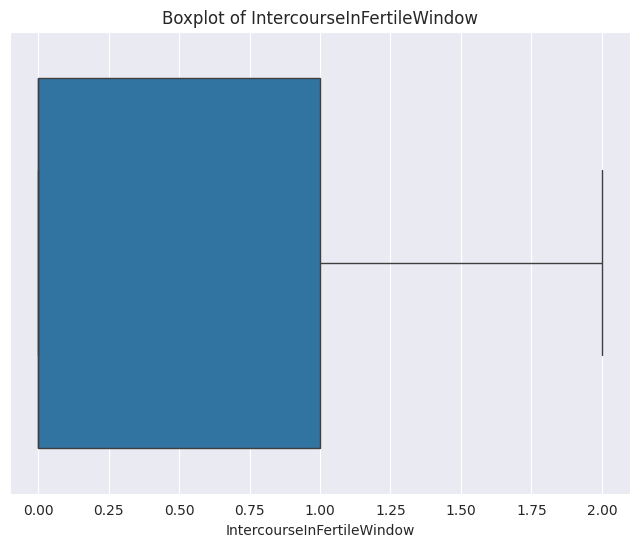

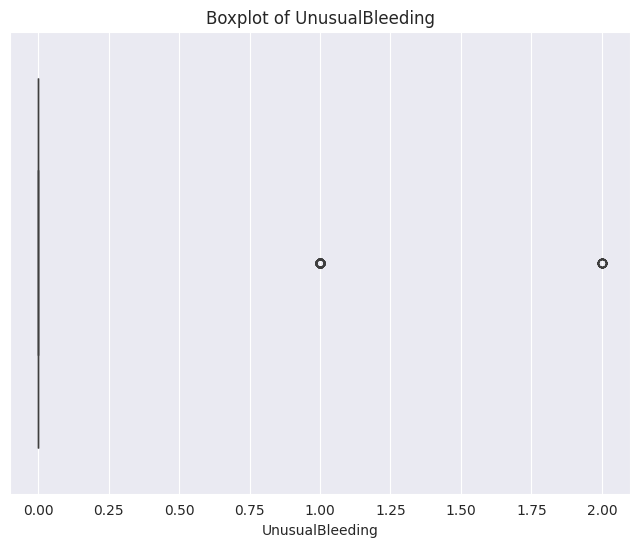

In [ ]:
# Handle Outliers dengan IQR
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100

    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)

# Visualisasi Hasil Handle Outliers dengan boxplot
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Tambah fitur simulasi
df['StressScore'] = np.random.randint(1, 11, size=len(df))
df['DietScore'] = np.random.randint(1, 11, size=len(df))

# Urutkan dan buat target
df.sort_values(by=['ClientID', 'CycleNumber'], inplace=True)
df['LengthofCycle_next'] = df.groupby('ClientID')['LengthofCycle'].shift(-1)

# Hapus baris dengan NaN di fitur dan target
df.dropna(subset=['LengthofCycle', 'LengthofMenses', 'LengthofCycle_next'], inplace=True)

# Buat label target
def classify_cycle(length):
    if 21 <= length <= 25:
        return 'Pendek'
    elif 26 <= length <= 30:
        return 'Normal'
    elif 31 <= length <= 35:
        return 'Panjang'
    else:
        return 'Tidak Normal'

df['CycleCategory'] = df['LengthofCycle_next'].apply(classify_cycle)

print("Distribusi Kelas Target:")
print(df['CycleCategory'].value_counts())

Distribusi Kelas Target:
CycleCategory
Normal          894
Panjang         330
Pendek          174
Tidak Normal    108
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506 entries, 73 to 1663
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1506 non-null   int64  
 1   CycleNumber                 1506 non-null   int64  
 2   Group                       1506 non-null   int64  
 3   CycleWithPeakorNot          1506 non-null   int64  
 4   ReproductiveCategory        1506 non-null   int64  
 5   LengthofCycle               1506 non-null   int64  
 6   EstimatedDayofOvulation     1506 non-null   int64  
 7   LengthofLutealPhase         1506 non-null   int64  
 8   FirstDayofHigh              1506 non-null   int64  
 9   TotalNumberofHighDays       1506 non-null   int64  
 10  TotalHighPostPeak           1506 non-null   int64  
 11  TotalNumberofPeakDays       1506 non-null   int64  
 12  TotalDaysofFertility        1506 non-null   int64  
 13  TotalFertilityFormula       1506 non-

In [ ]:
df.to_csv('data_coba.csv', index=False)

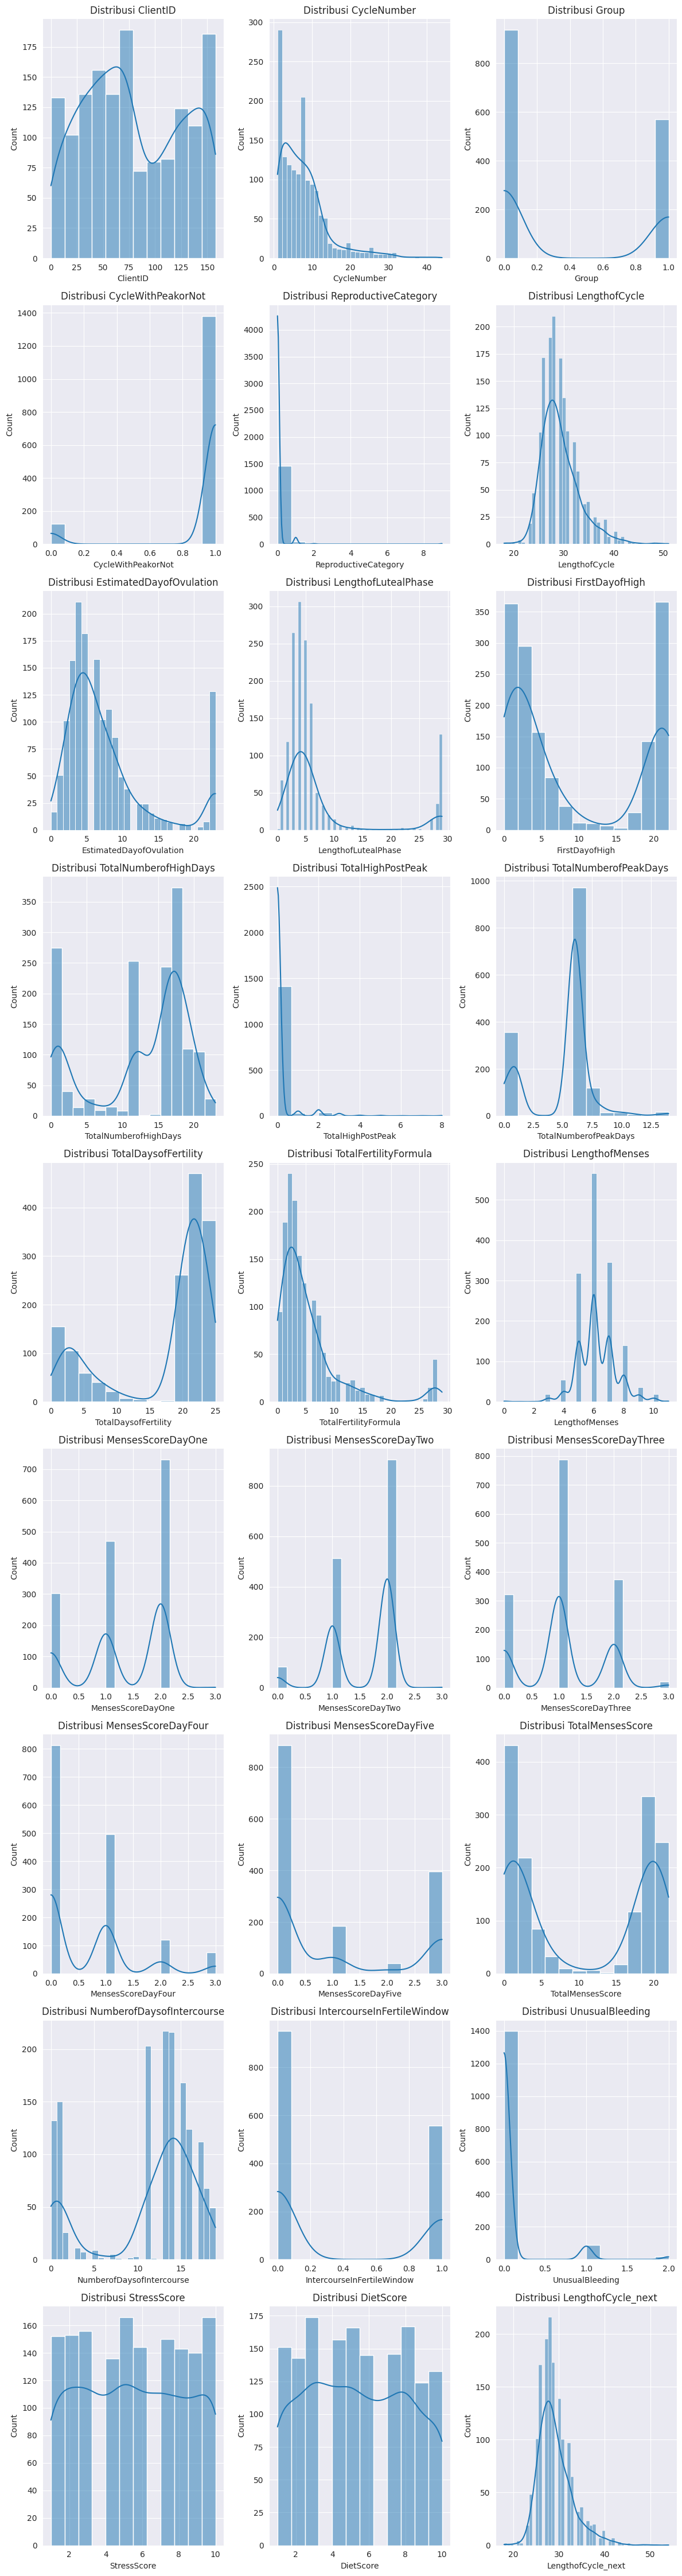

In [ ]:
# Plot distribusi
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Fitur yang akan digunakan
features = [
    'EstimatedDayofOvulation', 'DietScore', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
    'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility',
    'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne',
    'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
    'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse',
    'IntercourseInFertileWindow', 'UnusualBleeding',
    'StressScore'
]

### SMOTE dan Scalling

In [ ]:
# Scalling data
X = df[features]
y = df['CycleCategory']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Cek hasil kelas setelah di SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(pd.Series(y_smote).value_counts())


Distribusi Kelas Setelah SMOTE:
CycleCategory
Panjang         894
Normal          894
Pendek          894
Tidak Normal    894
Name: count, dtype: int64


In [ ]:
# Encode label target
label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y_smote)
num_classes = len(np.unique(y_encoded))

In [ ]:
# Standarisasi fitur - fit scaler di train, transform di train dan test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Konversi label ke format kategorikal untuk Deep Learning
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

## Modeling


### Deep Learning

In [ ]:
# Membangun dan latih model Deep Learning

input_shape = X_train.shape[1]

def create_dl_model(input_shape, num_classes):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),

        # Layer 1
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Layer 2
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # Layer 3
        Dense(64, activation='relu'),
        BatchNormalization(),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    return model

# Menampilkan ringkasan model
dl_model = create_dl_model(input_shape, num_classes)
dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,580 (189.77 KB)

 Trainable params: 47,684 (186.27 KB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Pelatihan model
history = dl_model.fit(
    X_train, y_train_cat,
    epochs=300,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/300
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.2964 - loss: 1.9811 - precision: 0.3121 - recall: 0.1790 - val_accuracy: 0.3322 - val_loss: 1.5755 - val_precision: 0.7500 - val_recall: 0.0210
Epoch 2/300
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3064 - loss: 1.8441 - precision: 0.3353 - recall: 0.1919 - val_accuracy: 0.3531 - val_loss: 1.5600 - val_precision: 0.5441 - val_recall: 0.1294
Epoch 3/300
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3496 - loss: 1.7483 - precision: 0.3872 - recall: 0.2203 - val_accuracy: 0.3986 - val_loss: 1.5193 - val_precision: 0.5169 - val_recall: 0.1608
Epoch 4/300
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3757 - loss: 1.6677 - precision: 0.4000 - recall: 0.2325 - val_accuracy: 0.4371 - val_loss: 1.4669 - val_precision: 0.5660 - val_recall: 0.2098
Epoch 5/300
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4130 - loss: 1.5959 - precision: 0.4689 - recall: 0.2604 - val_accuracy: 0.4580 - val_loss: 1.420

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=750,
    max_depth=49,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=720,
    max_depth=10,
    eval_metric='logloss',
    learning_rate=0.05,
    colsample_bytree=0.2,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

### SVM Modeling

In [ ]:
# membangun model dengan SVM
svm_model = SVC(kernel='rbf', C=5)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

## Evaluation


### Deep Learning

In [ ]:
# Tes Akurasi Deep Learning

test_loss, test_acc, test_precision, test_recall = dl_model.evaluate(X_test, y_test_cat, verbose=0)

if (test_precision + test_recall) == 0:
    test_f1 = 0.0
else:
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)


print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Prediksi
y_pred_probs = dl_model.predict(X_test)
y_pred_dl = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_dl, target_names=label_encoder_target.classes_))


Test Accuracy: 0.7584
Test Precision: 0.7929
Test Recall: 0.7165
Test F1 Score: 0.7528
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

=== Classification Report ===
              precision    recall  f1-score   support

      Normal       0.74      0.47      0.58       179
     Panjang       0.75      0.70      0.73       179
      Pendek       0.72      0.89      0.80       179
Tidak Normal       0.81      0.96      0.88       179

    accuracy                           0.76       716
   macro avg       0.76      0.76      0.75       716
weighted avg       0.76      0.76      0.75       716



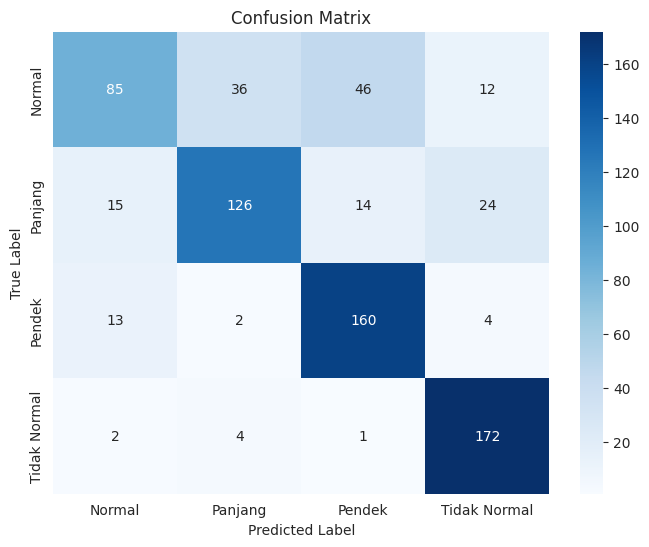

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

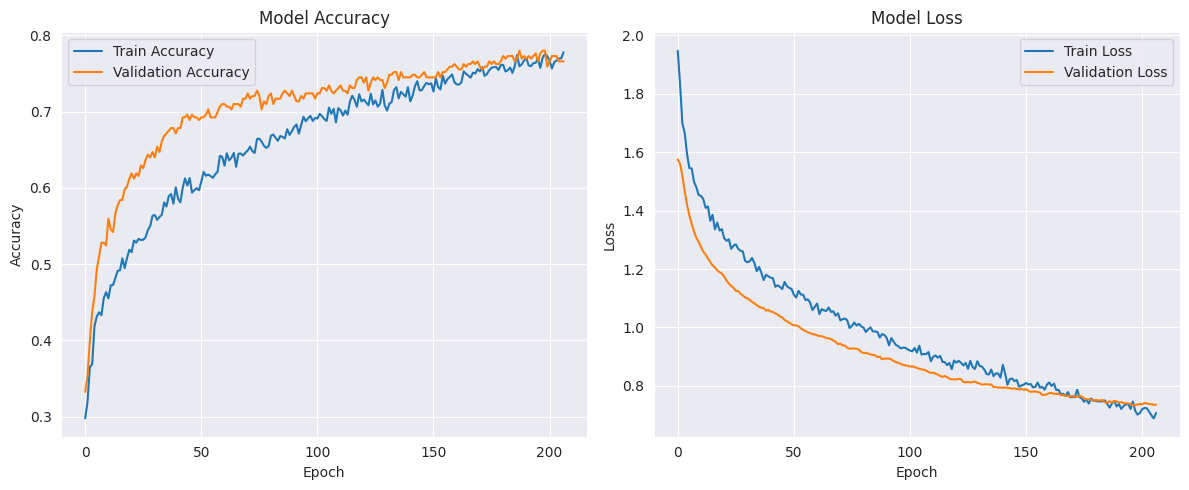

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
print("\n=== Evaluasi Model Random Forest ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Akurasi Model Random Forest:", accuracy_score(y_test, y_pred_rf))
print("F1 Score Random Forest:", f1_score(y_test, y_pred_rf, average='weighted'))
print("="*60)
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))


=== Evaluasi Model Random Forest ===
Confusion Matrix:
 [[109  40  24   6]
 [  9 153   6  11]
 [  8   3 163   5]
 [  3   3   0 173]]
Akurasi Model Random Forest: 0.835195530726257
F1 Score Random Forest: 0.8296984482942736
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.61      0.71       179
           1       0.77      0.85      0.81       179
           2       0.84      0.91      0.88       179
           3       0.89      0.97      0.93       179

    accuracy                           0.84       716
   macro avg       0.84      0.84      0.83       716
weighted avg       0.84      0.84      0.83       716



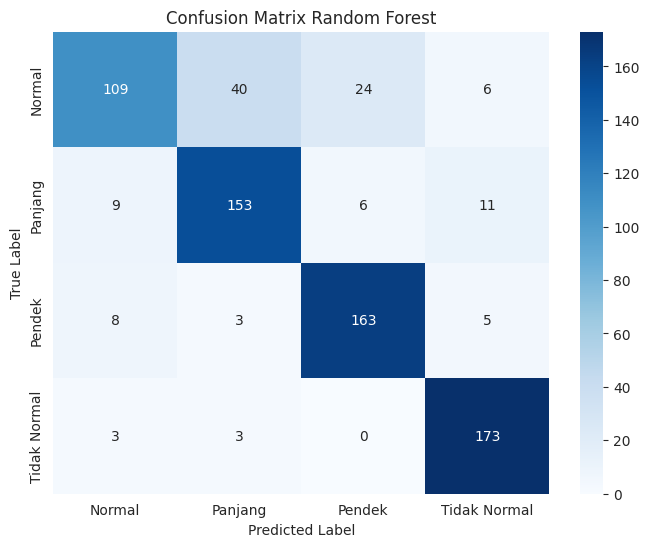

In [ ]:
# Confusion Martix Random Forest
cmrf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### XGBoost

In [ ]:
print("\n=== Evaluasi Model XGBoost ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Akurasi Model XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score XGBoost:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("="*60)
print("Classification Report XGBoost:\n", classification_report(y_test, y_pred_xgb))


=== Evaluasi Model XGBoost ===
Confusion Matrix:
 [[118  36  20   5]
 [ 18 146   5  10]
 [ 10   1 161   7]
 [  3   4   1 171]]
Akurasi Model XGBoost: 0.8324022346368715
F1 Score XGBoost: 0.8291156655617321
Classification Report XGBoost:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       179
           1       0.78      0.82      0.80       179
           2       0.86      0.90      0.88       179
           3       0.89      0.96      0.92       179

    accuracy                           0.83       716
   macro avg       0.83      0.83      0.83       716
weighted avg       0.83      0.83      0.83       716



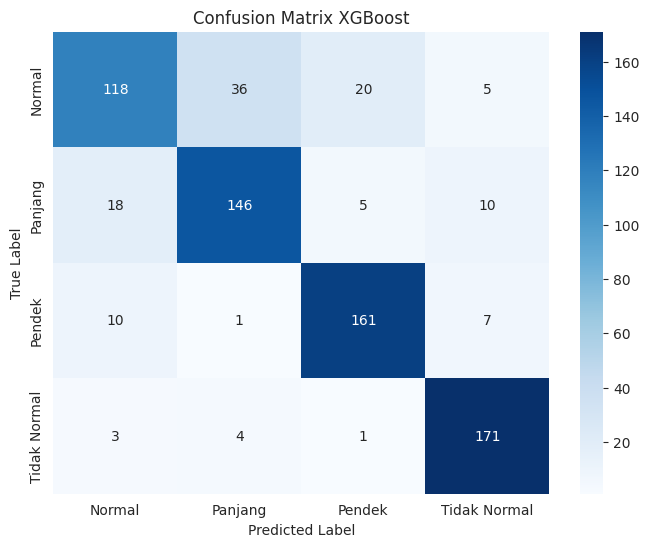

In [ ]:
# Confusion Martix XGBoost
cmxgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cmxgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### SVM

In [ ]:
print("\n=== Evaluasi Model SVM ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Akurasi Model SVM:", accuracy_score(y_test, y_pred_svm))
print("F1 Score SVM:", f1_score(y_test, y_pred_svm, average='weighted'))
print("="*60)
print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))


=== Evaluasi Model SVM ===
Confusion Matrix:
 [[107  33  30   9]
 [ 21 134   8  16]
 [ 14   3 158   4]
 [  5   8   2 164]]
Akurasi Model SVM: 0.7863128491620112
F1 Score SVM: 0.7817646786207828
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66       179
           1       0.75      0.75      0.75       179
           2       0.80      0.88      0.84       179
           3       0.85      0.92      0.88       179

    accuracy                           0.79       716
   macro avg       0.78      0.79      0.78       716
weighted avg       0.78      0.79      0.78       716



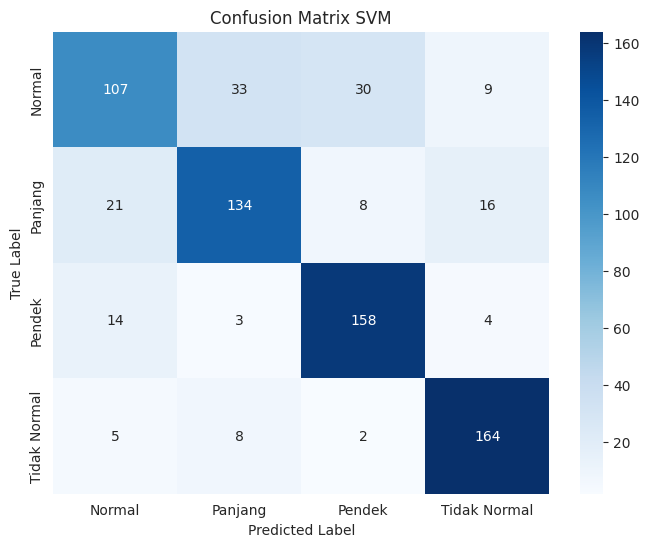

In [ ]:
# Confusion Martix SVM
cmsvm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Evaluasi Komparatif

In [ ]:
# Bandingkan performa semua model
models = {
    'Deep Learning': y_pred_dl,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'SVM': y_pred_svm
}

comparison = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

rows_list = []
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')
    prec = precision_score(y_test, pred, average='weighted')
    rec = recall_score(y_test, pred, average='weighted')

    rows_list.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Precision': prec,
        'Recall': rec
    })

comparison = pd.DataFrame.from_records(rows_list)


print("\n=== Perbandingan Model ===")
print(comparison.sort_values(by='F1-Score', ascending=False))


=== Perbandingan Model ===
           Model  Accuracy  F1-Score  Precision    Recall
1  Random Forest  0.835196  0.829698   0.836386  0.835196
2        XGBoost  0.832402  0.829116   0.829917  0.832402
3            SVM  0.786313  0.781765   0.782105  0.786313
0  Deep Learning  0.758380  0.746063   0.756108  0.758380


<Figure size 1200x800 with 0 Axes>

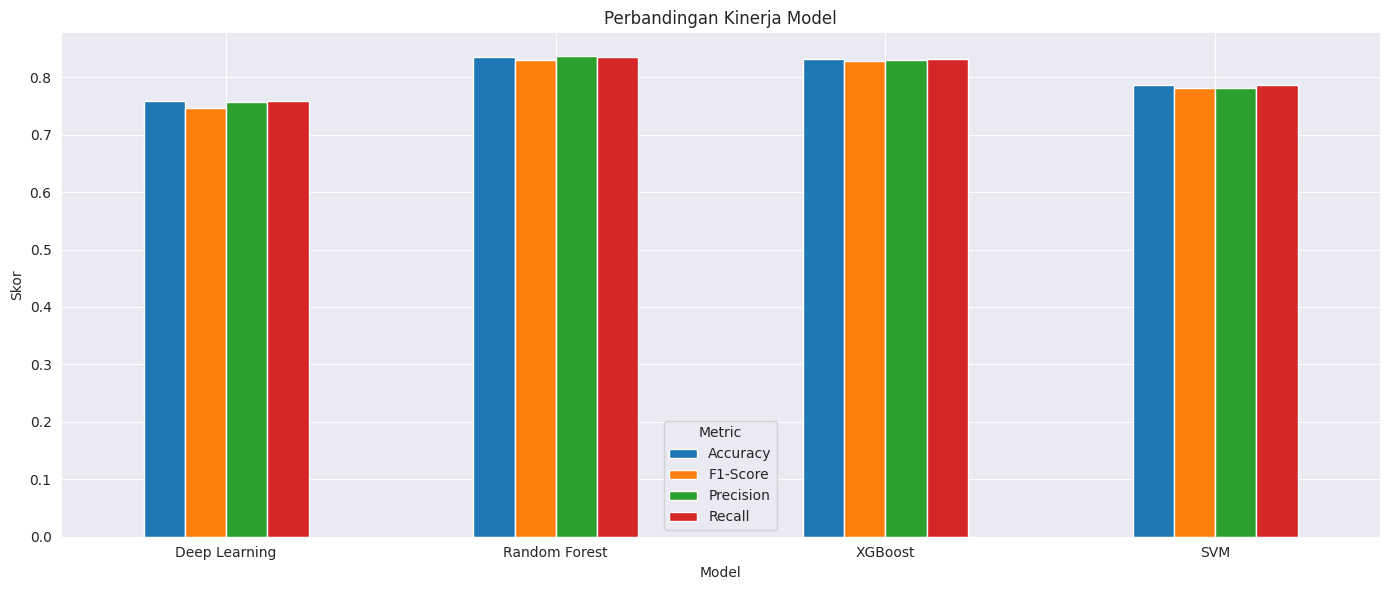

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
comparison.set_index('Model')[metrics].plot(kind='bar', figsize=(14, 6))
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Save Model

In [ ]:
# Simpan model Deep Learning
dl_model.save('cycle_classification_dl_model.keras')
print("Model Deep Learning telah disimpan dalam format Keras modern (.keras)")

# Untuk memuat model nantinya, gunakan:
# loaded_model = tf.keras.models.load_model('cycle_classification_dl_model.keras')

Model Deep Learning telah disimpan dalam format Keras modern (.keras)
